# Overview

Restaurants have become one of the most important parts of our daily routine whether 
it is casual dining or visit a club. Below is the data visualization of zomato restaurant in Pune.
Trying to figure out the most favorable restaurant and cuisine.
The dataset was collected using zomato api( https://developers.zomato.com/api).

# 1. Preparing Data:
      Dataset consists of restaurant details of many cities, only data of Pune is extracted.
      Unnecessary data was dropped
      Removing the duplicate data
      Displaying the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=20)     
plt.rc('ytick', labelsize=20)

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import pandas as pd

In [2]:
data = pd.read_csv('zomato_restaurants_in_India.csv')

In [3]:
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
data=data[data.city=="Pune"]

In [5]:
len(data)

4217

In [6]:
data=data.drop(['res_id','url','address','latitude','longitude','country_id','zipcode','city','city_id','locality_verbose','currency'],axis=1)

In [7]:
data

,name,establishment,locality,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
164447,Harajuku - The O Hotel,['Fine Dining'],"The O Hotel, Koregaon Park","Japanese, Sushi","12:30 PM to 3 PM, 7:30 PM to 11:30 PM",4500,4,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",3.7,Good,96,38,0.0,-1,-1
164448,Mix@36 - The Westin,['Lounge'],"The Westin, Mundhwa","Finger Food, Asian, Continental, North Indian","5 PM to 1 AM (Mon-Thu, Sun), 5 PM to 2 AM (Fri...",4200,4,"['Cash', 'Debit Card', 'Serves Alcohol', 'Take...",4.0,Very Good,682,78,0.0,-1,-1
164449,Kangan - The Westin,['Fine Dining'],"The Westin, Mundhwa","Mughlai, North Indian","6:30pm – 11:30pm (Mon-Fri),12:30pm – 3:30pm, 6...",4000,4,"['Serves Alcohol', 'Cash', 'Debit Card', 'Take...",4.0,Very Good,310,285,0.0,-1,-1
164450,Palette - The Westin,['Fine Dining'],"The Westin, Mundhwa","Asian, Continental",6:30 PM to 11:30 PM,4000,4,"['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...",3.3,Average,9,31,0.0,-1,-1
164451,Coriander Kitchen - Conrad Pune,['Fine Dining'],"Conrad Pune, Bund Garden Road","North Indian, Asian, Mediterranean","6 AM to 11:30 PM (Mon-Thu, Sun), 6 AM to 12:30...",3200,4,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.4,Very Good,500,1116,0.0,-1,-1
164452,Baan Tao - Hyatt Pune,['Fine Dining'],"Hyatt Pune, Nagar Road","Chinese, Thai, Vietnamese, Malaysian, Asian, S...","12:30 PM to 3 PM, 7 PM to 11:30 PM",3000,4,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Ser...",4.4,Very Good,718,1275,0.0,-1,-1
164453,Alto Vino - JW Marriott Pune,['Fine Dining'],"JW Marriott Pune, Senapati Bapat Road","Italian, Salad","12:30 PM to 3 PM, 7 PM to 11:30 PM (Mon-Sun)",3000,4,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Ser...",4.4,Very Good,652,352,0.0,-1,-1
164454,Feast - Sheraton Grand,['Fine Dining'],"Sheraton Grand, Bund Garden Road","North Indian, Asian, European",24 Hours,3000,4,"['Credit Card', 'Debit Card', 'Lunch', 'Breakf...",4.4,Very Good,520,1304,0.0,-1,-1
164455,The House Of Medici - The Westin,['Lounge'],"The Westin, Mundhwa","Asian, Continental","7:30 PM to 1:30 AM (Wed-Sat), Mon, Tue & Sun C...",3000,4,"['Dinner', 'Serves Alcohol', 'Cash', 'Debit Ca...",3.9,Good,257,298,0.0,-1,-1
164456,Koji - Conrad Pune,['Fine Dining'],"Conrad Pune, Bund Garden Road","Chinese, Japanese, Thai","12:30PM to 3:30PM, 7PM to 11:30PM (Mon-Fri),12...",3000,4,"['Lunch', 'Serves Alcohol', 'Credit Card', 'Di...",4.2,Very Good,185,242,0.0,-1,-1


In [8]:
data.index = range(len(data))

In [9]:
data=data.drop_duplicates(subset=None, keep='first')
data.shape
data.head(5)

,name,establishment,locality,cuisines,timings,average_cost_for_two,price_range,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,Harajuku - The O Hotel,['Fine Dining'],"The O Hotel, Koregaon Park","Japanese, Sushi","12:30 PM to 3 PM, 7:30 PM to 11:30 PM",4500,4,"['Cash', 'Debit Card', 'Lunch', 'Credit Card',...",3.7,Good,96,38,0.0,-1,-1
1,Mix@36 - The Westin,['Lounge'],"The Westin, Mundhwa","Finger Food, Asian, Continental, North Indian","5 PM to 1 AM (Mon-Thu, Sun), 5 PM to 2 AM (Fri...",4200,4,"['Cash', 'Debit Card', 'Serves Alcohol', 'Take...",4.0,Very Good,682,78,0.0,-1,-1
2,Kangan - The Westin,['Fine Dining'],"The Westin, Mundhwa","Mughlai, North Indian","6:30pm – 11:30pm (Mon-Fri),12:30pm – 3:30pm, 6...",4000,4,"['Serves Alcohol', 'Cash', 'Debit Card', 'Take...",4.0,Very Good,310,285,0.0,-1,-1
3,Palette - The Westin,['Fine Dining'],"The Westin, Mundhwa","Asian, Continental",6:30 PM to 11:30 PM,4000,4,"['Serves Alcohol', 'Credit Card', 'Lunch', 'Ca...",3.3,Average,9,31,0.0,-1,-1
4,Coriander Kitchen - Conrad Pune,['Fine Dining'],"Conrad Pune, Bund Garden Road","North Indian, Asian, Mediterranean","6 AM to 11:30 PM (Mon-Thu, Sun), 6 AM to 12:30...",3200,4,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.4,Very Good,500,1116,0.0,-1,-1


In [10]:
len(data)

1911

# 2. Establishment in Pune
    Various establishment has been shown using a bar graph.
    It is observed that Pune has a sufficient number of 'quick bites' and 'casual dining'.
    Pune need some 'Microbrewery' and some 'Club'    

In [11]:
est_count = data['establishment'].value_counts()
est_count = est_count.sort_values(ascending=True, axis=0)

<Container object of 23 artists>

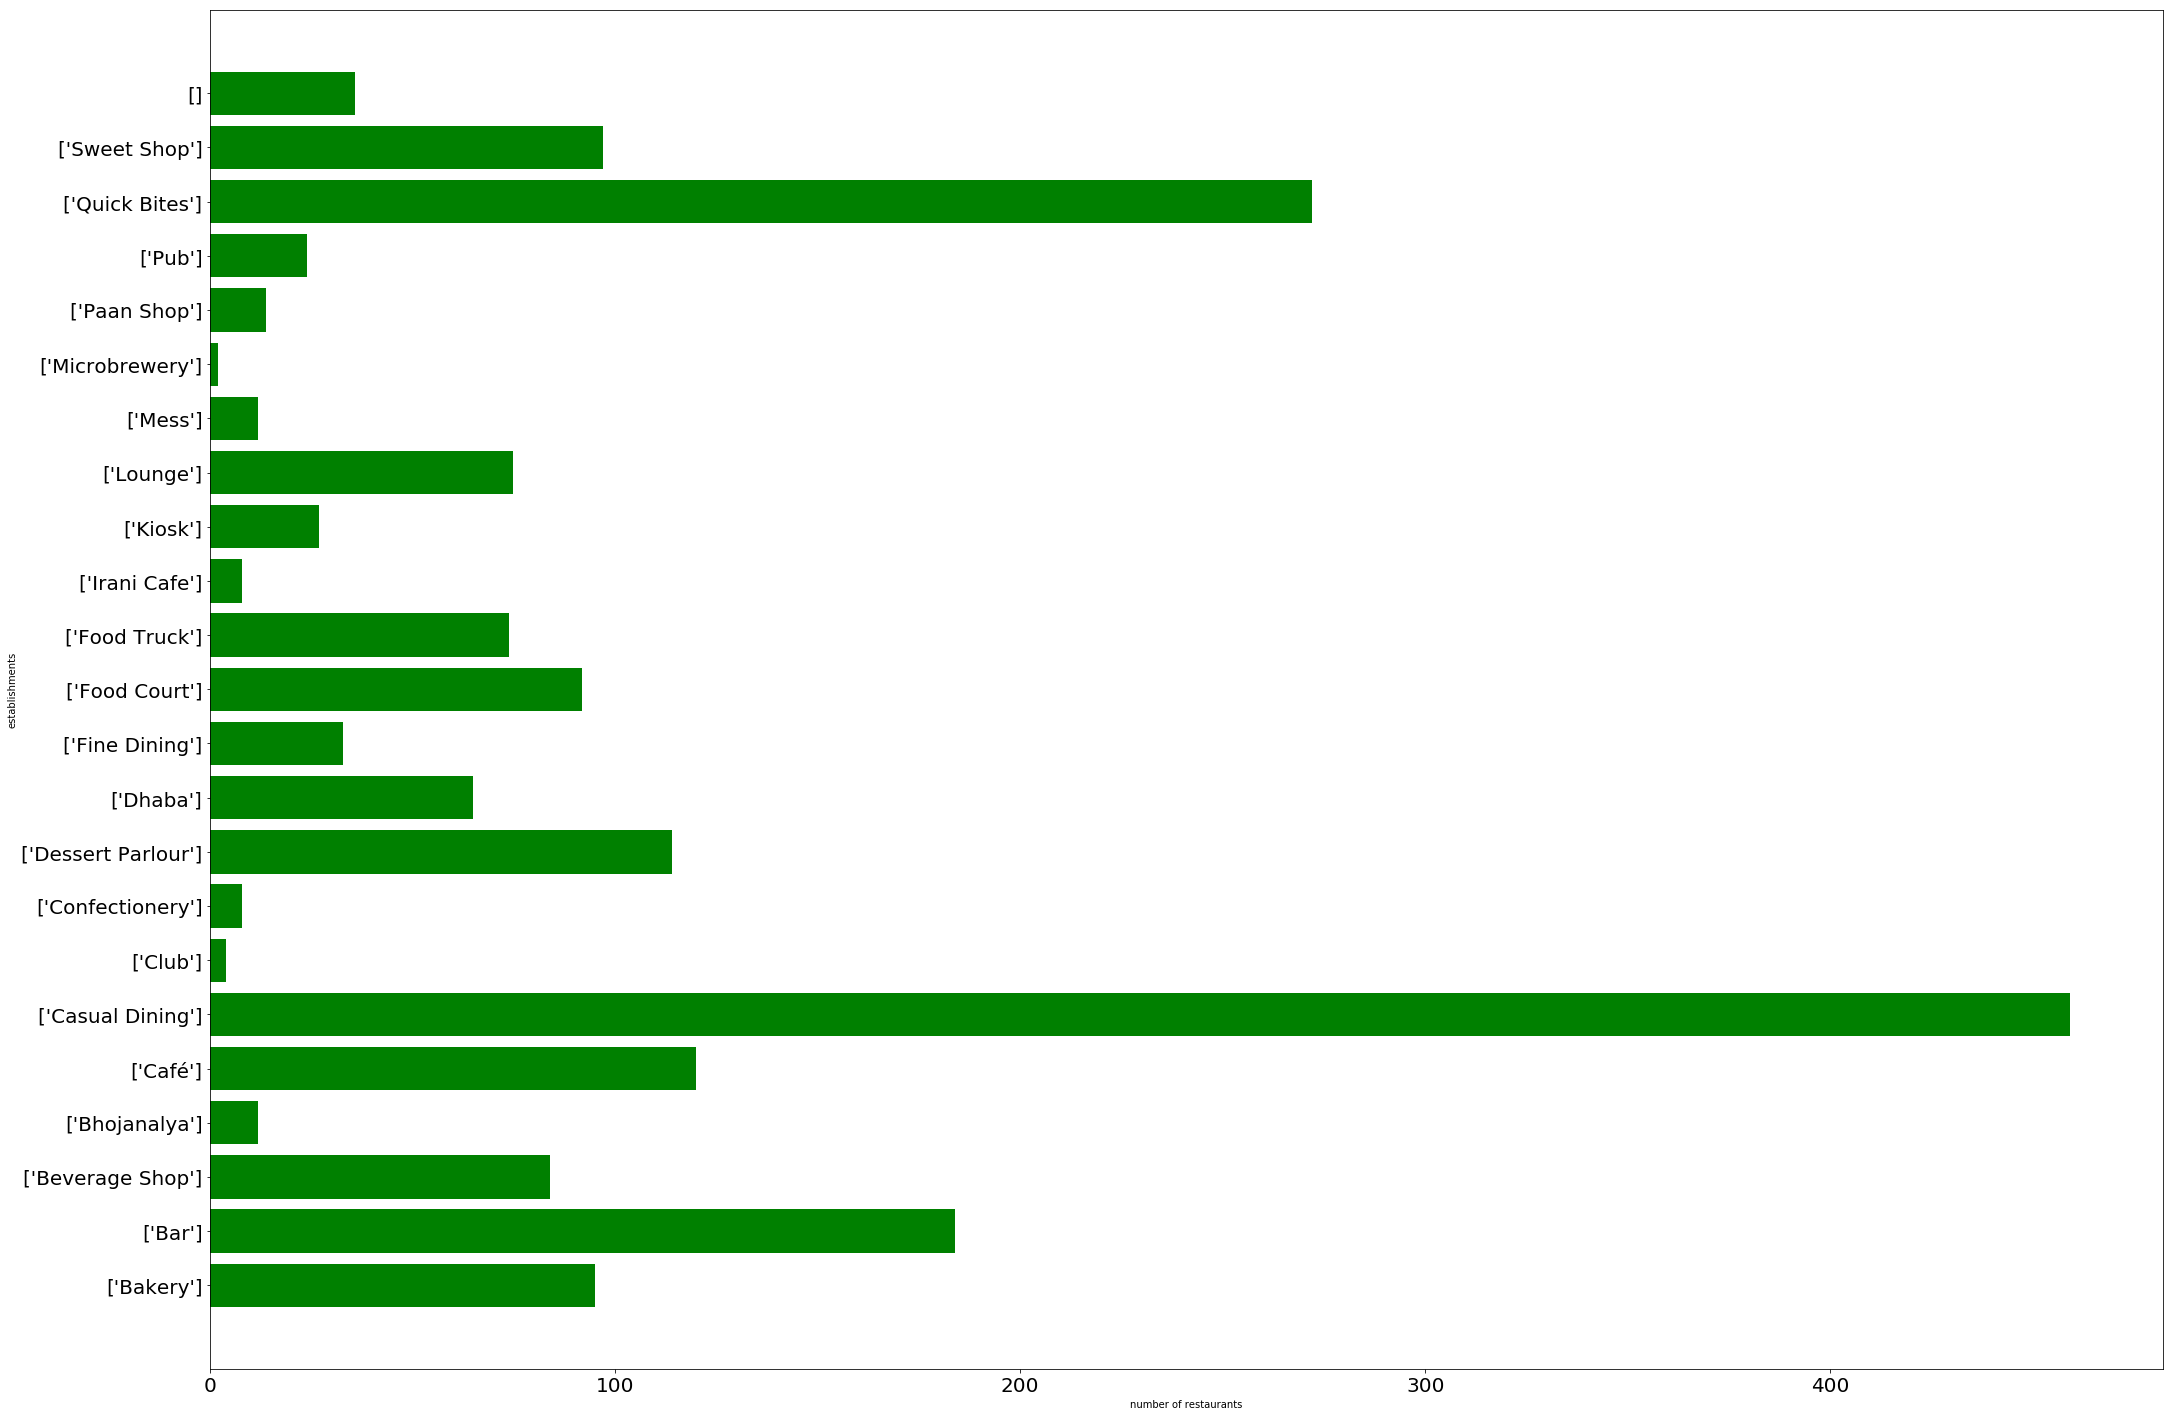

In [12]:
plt.figure(figsize=(35,25))
plt.xlabel('number of restaurants')
plt.ylabel('establishments')
plt.barh(est_count.index,est_count.values, color='green')

# 3. Localities with maximum number of restaurant¶
    Only the top 5 localities have been shown using a graph.
    It can be observed that Baner has a maximum number of restaurants followed by Viman Nagar.

In [13]:
#top 10 locality
loc_count = data['locality'].value_counts() 
loc_count = loc_count.sort_values(ascending=False, axis=0)
loc_count=loc_count.head()

In [14]:
loc_count = loc_count.sort_values(ascending=True, axis=0)

In [15]:
loc_count

Hinjawadi         74
Kothrud           87
Koregaon Park     88
Viman Nagar       95
Baner            103
Name: locality, dtype: int64

<Container object of 5 artists>

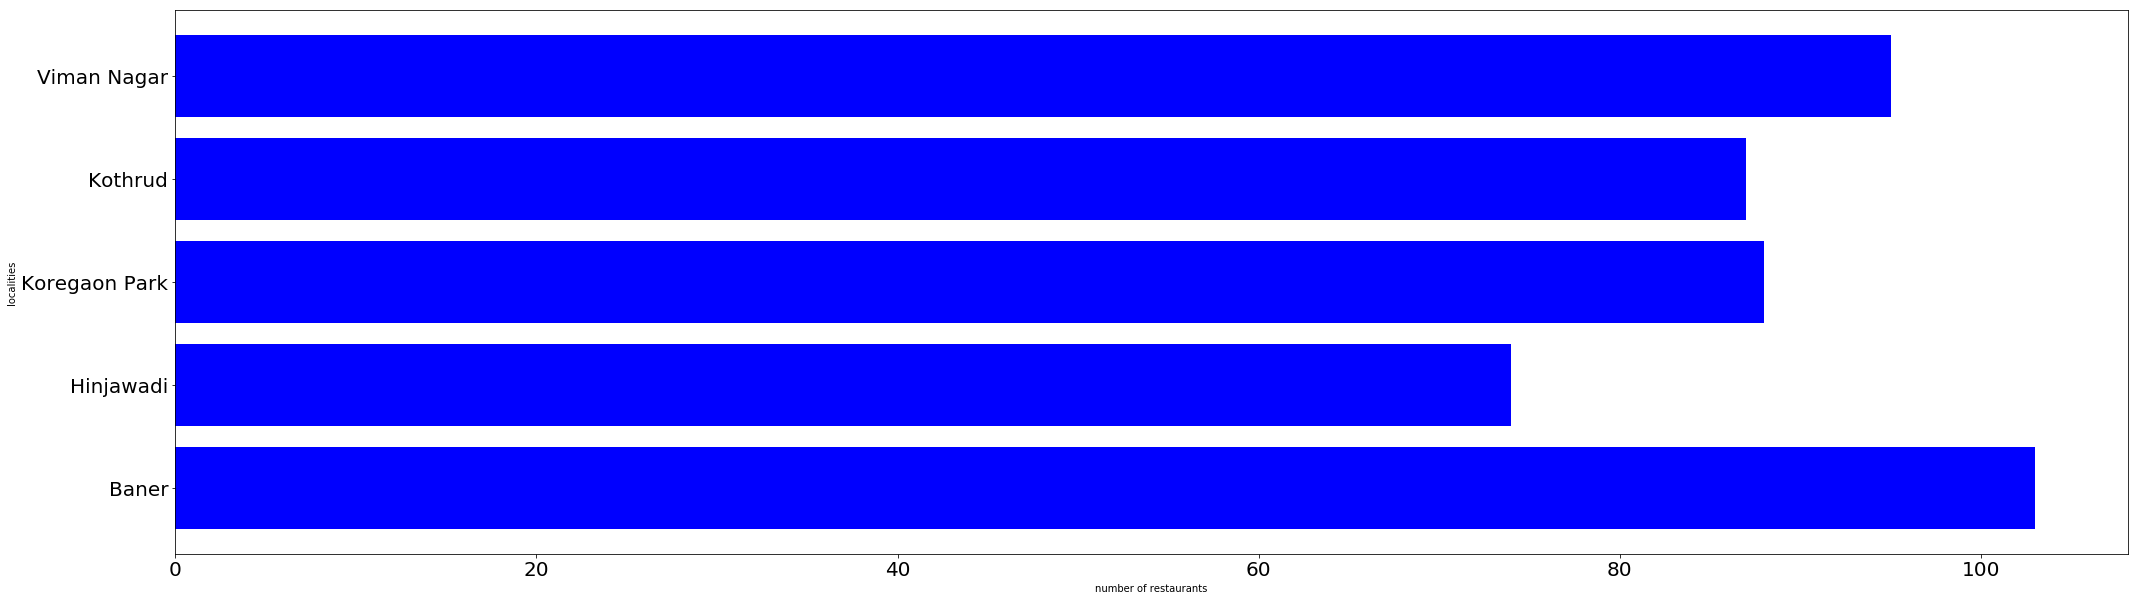

In [16]:
plt.figure(figsize=(35,10))
plt.xlabel('number of restaurants')
plt.ylabel('localities')
plt.barh(loc_count.index,loc_count.values, color='blue')

# 4.Word cloud for Cuisines

Word Cloud is a data visualization technique used for representing text data in which the size of each word         indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

In the word cloud below the cuisines have been represented using the word cloud.

The word cloud has been represented using an image of apple which is imported externally.


In [17]:
words=data["cuisines"]
words=words.str.cat(sep=', ')

In [18]:
mask = np.array(Image.open("apple.png"))

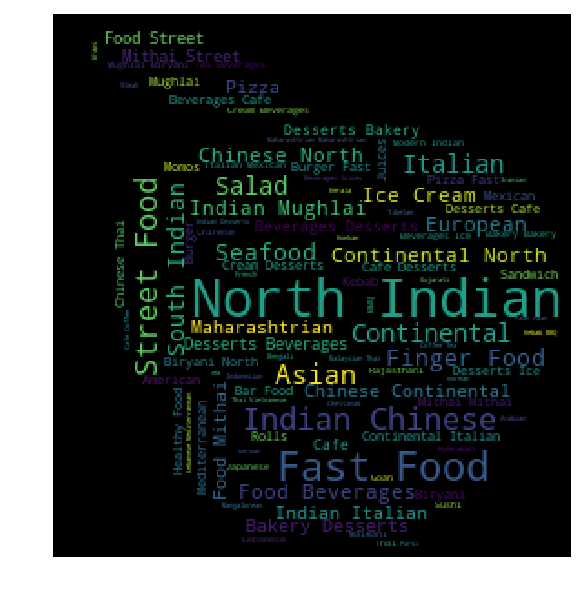

In [19]:
# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='black', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(words, mask)

# 5. Stacked graph
      

The percentage of restaurants having a digital payment system, serving alcohol and having pre-booking facilities have been represented below.
It is clear from the graph that almost 85 percent of the restaurant in Pune have a adigital payment system.
Observed that 40 percent of restaurants sever alcohol and pre-booking facility is available only in 20 percent restaurants

In [20]:
total=data.shape[0]
digital=data[data['highlights'].str.contains('Card|Digital')]
alcohol=data[data['highlights'].str.contains('Alcohol')]
booking=data[data['highlights'].str.contains('book|table')]

In [21]:
dig=(digital.shape[0]/total*100, (total-digital.shape[0])/total*100)
alc=(alcohol.shape[0]/total*100, (total-alcohol.shape[0])/total*100)
book=(booking.shape[0]/total*100, (total-booking.shape[0])/total*100)

In [22]:
N = 3
yes = (digital.shape[0]/total*100,alcohol.shape[0]/total*100   ,booking.shape[0]/total*100)
no = ((total-digital.shape[0])/total*100,(total-alcohol.shape[0])/total*100  , (total-booking.shape[0])/total*100 )

In [23]:
ind = np.arange(N)    
width = 0.30   

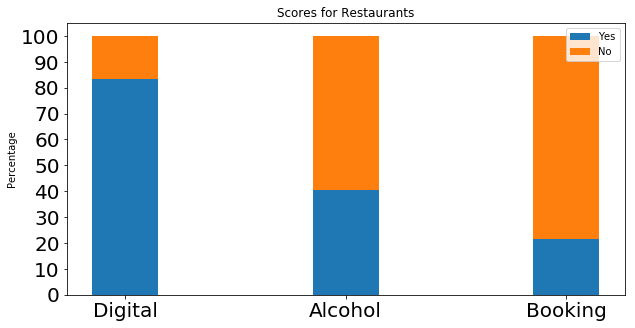

In [24]:
plt.figure(figsize=(10,5))
p1 = plt.bar(ind, yes, width)
p2 = plt.bar(ind, no, width, bottom=yes)
plt.ylabel('Percentage')
plt.title('Scores for Restaurants')
plt.xticks(ind, ('Digital', 'Alcohol','Booking'))
plt.yticks(np.arange(0, 101, 10))
plt.legend((p1[0], p2[0]), ('Yes', 'No'))

plt.show()

# 6.Relation between rating of restaurant and avg cost for two people

In [25]:
rating1=data.average_cost_for_two[data.aggregate_rating>4.5]
rating1=rating1.mean(axis=0)

In [26]:
rating2=data.average_cost_for_two[(data.aggregate_rating>4) & (data.aggregate_rating<=4.5)]
rating2=rating2.mean(axis=0)

In [27]:
rating3=data.average_cost_for_two[(data.aggregate_rating>3.5) & (data.aggregate_rating<=4)]
rating3=rating3.mean(axis=0)

rating4=data.average_cost_for_two[(data.aggregate_rating>3) & (data.aggregate_rating<=3.5)]
rating4=rating4.mean(axis=0)

rating5=data.average_cost_for_two[(data.aggregate_rating>2.5) & (data.aggregate_rating<=3)]
rating5=rating5.mean(axis=0)

rating6=data.average_cost_for_two[(data.aggregate_rating>2) & (data.aggregate_rating<=2.5)]
rating6=rating6.mean(axis=0)

rating7=data.average_cost_for_two[(data.aggregate_rating<2)]
rating7=rating7.mean(axis=0)

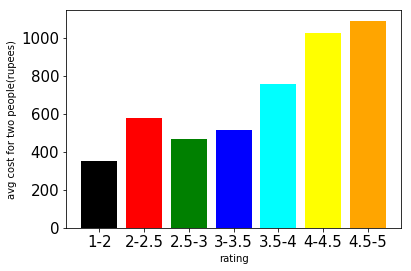

In [28]:
height = [rating7,rating6,rating5,rating4,rating3,rating2,rating1]
bars = ('1-2','2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5','4.5-5')
y_pos = np.arange(len(bars))

plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
plt.xlabel('rating')
plt.ylabel('avg cost for two people(rupees)')
plt.bar(y_pos, height, color=['black', 'red', 'green', 'blue', 'cyan','yellow','orange'])
plt.xticks(y_pos, bars)
plt.show()